In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from IPython.core.display_functions import display
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor  # or GradientBoostingClassifier, based on your problem
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import rankdata
from sklearn.metrics import roc_auc_score

from sklearn.metrics import r2_score

In [49]:
df = pd.read_csv("diamonds.csv")

In [50]:
df.columns

Index(['Unnamed: 0', 'cut', 'color', 'clarity', 'carat_weight', 'cut_quality',
       'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size',
       'culet_condition', 'depth_percent', 'table_percent', 'meas_length',
       'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color',
       'fluor_intensity', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity', 'total_sales_price'],
      dtype='object')

In [51]:
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0                     0
cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64


In [52]:
for col in df.columns:
    if (df[col] == 'unknown').all():
        print(f'The column "{col}" contains only "unknown" values.')
    else:
        print(f'The column "{col}" contains at least one value different from "unknown".')

# Create a list of columns containing only 'unknown' values
columns_to_drop = [col for col in df.columns if (df[col] == 'unknown').all()]

# Drop the columns from the DataFrame
df_cleaned = df.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
display(df_cleaned.head())


The column "Unnamed: 0" contains at least one value different from "unknown".
The column "cut" contains at least one value different from "unknown".
The column "color" contains at least one value different from "unknown".
The column "clarity" contains at least one value different from "unknown".
The column "carat_weight" contains at least one value different from "unknown".
The column "cut_quality" contains at least one value different from "unknown".
The column "lab" contains at least one value different from "unknown".
The column "symmetry" contains at least one value different from "unknown".
The column "polish" contains at least one value different from "unknown".
The column "eye_clean" contains at least one value different from "unknown".
The column "culet_size" contains at least one value different from "unknown".
The column "culet_condition" contains at least one value different from "unknown".
The column "depth_percent" contains at least one value different from "unknown".
The 

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09000,Excellent,IGI,Very Good,Very Good,unknown,...,1.79000,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09000,Very Good,IGI,Very Good,Very Good,unknown,...,1.78000,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09000,Excellent,IGI,Very Good,Very Good,unknown,...,1.77000,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09000,Excellent,IGI,Very Good,Very Good,unknown,...,1.78000,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09000,Very Good,IGI,Very Good,Excellent,unknown,...,1.82000,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


In [53]:
display(df['total_sales_price'].sort_values(ascending=False).head(20))

219702    1449881
219701    1350000
219700    1315496
219699    1292500
219698    1210692
219697    1161102
219696    1132347
219695    1124122
219694    1121792
219693    1121792
219692    1097128
219691    1061625
219690    1040739
219689    1034844
219688    1029127
219687    1027011
219686    1026120
219685    1003311
219684     982560
219683     966401
Name: total_sales_price, dtype: int64

Total amount of rows: 219703
Number of rows being dropped: 19294


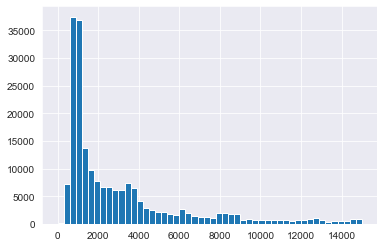

In [54]:
# Set the x domain limit
limit = 15000

# Create the histogram
df['total_sales_price'].hist(bins=50, range=(0, limit))

# Calculate the number of rows being dropped
rows_dropped = len(df[df['total_sales_price'] > limit])

# Print the number of rows being dropped
print(f'Total amount of rows: {len(df)}')
print(f'Number of rows being dropped: {rows_dropped}')

# Display the histogram
plt.show()


In [55]:
# Filter the DataFrame to keep rows with 'total_sales_price' less than or equal to 60,000
df_filtered = df[df['total_sales_price'] <= limit]

# Display the filtered DataFrame
display(df_filtered)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09000,Excellent,IGI,Very Good,Very Good,unknown,...,1.79000,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09000,Very Good,IGI,Very Good,Very Good,unknown,...,1.78000,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09000,Excellent,IGI,Very Good,Very Good,unknown,...,1.77000,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09000,Excellent,IGI,Very Good,Very Good,unknown,...,1.78000,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09000,Very Good,IGI,Very Good,Excellent,unknown,...,1.82000,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201404,201405,Radiant,J,VS2,2.50000,unknown,HRD,Excellent,Excellent,unknown,...,4.95000,unknown,unknown,unknown,Strong,unknown,unknown,unknown,unknown,15000
201405,201406,Round,K,SI2,2.00000,Very Good,GIA,Very Good,Excellent,Yes,...,4.96000,STK,TK,unknown,None,unknown,unknown,unknown,unknown,15000
201406,201407,Round,K,SI2,2.00000,Excellent,GIA,Excellent,Excellent,Yes,...,4.97000,M,STK,unknown,None,unknown,unknown,unknown,unknown,15000
201407,201408,Round,E,SI2,1.50000,Excellent,GIA,Excellent,Excellent,Yes,...,4.51000,M,STK,unknown,None,unknown,unknown,unknown,unknown,15000


In [56]:

# for each encoded variable that has an unknown flag coded 0 or 1, run groupby and get the average sale price for uknown vs known
# once done for each variable, then combine the groupby so that we know unknown vs known for variable one with variable two
# the combinations will be both are unkown, both are known, or one is known, or the other is known

# Count the number of rows before filtering
rows_before = len(df)

# Calculate 'unknown_count' column using DataFrame.isin() and DataFrame.sum() for all columns
df['unknown_count'] = df.isin(['unknown']).sum(axis=1)

# Filter the DataFrame to keep rows with 'unknown_count' less than or equal to 9
df_filtered = df[df['unknown_count'] <= 9]
df = df[df['unknown_count'] <= 7]

# Count the number of rows after filtering
rows_after = len(df_filtered)

# Calculate the number of rows being thrown out
rows_thrown_out = rows_before - rows_after

# Print the number of rows being thrown out
print(f'Number of rows thrown out: {rows_thrown_out}')

# Display the 'unknown_count' column of the filtered DataFrame
display(df_filtered['unknown_count'])

# Print the top rows of the filtered DataFrame sorted by 'unknown_count' in descending order
print(df_filtered.sort_values(by='unknown_count', ascending=False).head())




Number of rows thrown out: 61015


0         7
1         7
2         8
3         8
4         7
         ..
219696    8
219698    7
219699    7
219700    7
219701    7
Name: unknown_count, Length: 158688, dtype: int64

        Unnamed: 0    cut color clarity  carat_weight cut_quality  lab  \
109930      109931  Round     E    VVS2       0.40000   Excellent  GIA   
86545        86546  Round     J     VS2       0.50000   Very Good  IGI   
25454        25454  Round     I    VVS2       0.30000   Very Good  GIA   
25453        25453  Round     I     VS2       0.30000   Very Good  GIA   
25451        25451  Round     I    VVS1       0.30000   Very Good  GIA   

         symmetry     polish eye_clean  ... girdle_min girdle_max  \
109930  Excellent  Excellent   unknown  ...    unknown    unknown   
86545   Very Good  Excellent   unknown  ...    unknown    unknown   
25454   Very Good  Very Good   unknown  ...    unknown    unknown   
25453   Very Good  Very Good   unknown  ...    unknown    unknown   
25451   Excellent  Excellent   unknown  ...    unknown    unknown   

        fluor_color  fluor_intensity  fancy_color_dominant_color  \
109930      unknown            Faint                     unknown   
8654

In [57]:
display(df['unknown_count'].value_counts())

7    60437
6    44977
5     5771
4      492
3        8
2        1
Name: unknown_count, dtype: int64

In [58]:
missing_df = df[df['unknown_count'] >= 9]
display(missing_df)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price,unknown_count


In [59]:
for i in df.columns:
    display(df.groupby(i)['total_sales_price'].agg(['mean', 'std', 'count', 'min', 'max']))

,mean,std,count,min,max
Unnamed: 0,,,,,
0,200.00000,NaN,1,200,200
1,200.00000,NaN,1,200,200
4,200.00000,NaN,1,200,200
5,200.00000,NaN,1,200,200
6,200.00000,NaN,1,200,200
...,...,...,...,...,...
219691,1040739.00000,NaN,1,1040739,1040739
219699,1210692.00000,NaN,1,1210692,1210692
219700,1292500.00000,NaN,1,1292500,1292500


,mean,std,count,min,max
cut,,,,,
Asscher,31158.70556,54586.21476,180,840,449468
Cushion,30535.35922,43069.66198,103,1214,208278
Cushion Modified,15536.85504,28716.60546,2580,553,490750
Emerald,10207.71770,38124.53412,3050,352,757920
Heart,12505.21606,34688.42674,1245,308,544791
Marquise,7316.29310,23513.07976,580,264,375000
Oval,13768.61811,30006.54328,2938,288,549349
Pear,14246.67652,35874.79329,2572,288,591332
Princess,7991.69031,39142.74763,1424,308,1350000


,mean,std,count,min,max
color,,,,,
D,5610.67202,24102.73928,16449,208,1040739
E,5072.53692,22845.73165,16859,200,1315496
F,5137.82768,20120.43320,15773,200,1034844
G,6278.78840,25209.01566,14178,212,954700
H,6881.02367,26449.82114,12883,260,964516
I,5896.95651,18187.29301,10946,262,538617
J,5497.78974,14910.05688,8342,298,421458
K,5284.73845,16261.34516,5735,270,393277
L,5107.89318,14178.40299,3005,242,294562


,mean,std,count,min,max
clarity,,,,,
I1,6102.87157,21872.32594,3644,276,982560
I2,4518.62898,6331.47976,566,242,61358
I3,4235.16279,7958.46965,43,328,36007
IF,8491.86031,39226.44520,5913,230,1034844
SI1,6427.06473,18111.25072,17735,262,493786
SI2,6156.64236,18758.84772,14084,240,1350000
VS1,7161.20459,29521.10815,18984,214,1315496
VS2,7411.09794,25336.67159,18042,214,1292500
VVS1,4822.97490,20146.38475,15854,200,757920


,mean,std,count,min,max
carat_weight,,,,,
0.08000,202.00000,NaN,1,202,202
0.09000,207.83784,12.41306,37,200,232
0.10000,214.00000,2.82843,4,212,218
0.11000,262.85714,25.97068,7,244,300
0.12000,285.46154,22.59598,26,260,334
...,...,...,...,...,...
18.10000,393277.00000,NaN,1,393277,393277
18.13000,964516.00000,NaN,1,964516,964516
18.16000,236080.00000,NaN,1,236080,236080


,mean,std,count,min,max
cut_quality,,,,,
Excellent,5495.37767,22717.23645,76842,200,1315496
Fair,1880.25000,1218.59191,4,567,3483
Good,8889.14286,10255.36099,14,506,27192
Very Good,4279.11420,13651.87859,18792,200,591332
unknown,13454.09399,37805.67480,16034,264,1350000


,mean,std,count,min,max
lab,,,,,
GIA,6351.54700,24316.77228,105973,242,1350000
HRD,23031.60648,51118.70210,432,368,541196
IGI,6722.53229,24275.93335,5281,200,591332


,mean,std,count,min,max
symmetry,,,,,
Excellent,6171.45514,24490.67266,75572,200,1315496
Fair,22457.22424,54971.61060,165,567,375000
Good,21432.35905,56205.61821,2994,575,1350000
Poor,33025.66667,45925.83044,6,3780,121550
Very Good,5586.89338,18257.44521,32949,200,1292500


,mean,std,count,min,max
polish,,,,,
Excellent,6194.69815,23145.45109,92552,200,1315496
Fair,3704.16667,3222.48069,6,648,8316
Good,21832.56269,70062.74495,981,567,1350000
Poor,3208.50000,1826.45682,2,1917,4500
Very Good,6820.92852,26129.49168,18145,200,1292500


,mean,std,count,min,max
eye_clean,,,,,
Borderline,3856.91816,4465.14618,501,456,35735
E1,1769.07667,2098.64963,300,308,22254
No,6024.29730,6563.21979,37,512,29568
Yes,4014.86228,13611.88999,54082,242,781982
unknown,8785.64840,31505.96541,56766,200,1350000


,mean,std,count,min,max
culet_size,,,,,
EL,27522.50000,26882.71887,4,3419,56890
L,23922.17647,20273.61108,34,3600,107232
M,10412.14583,28332.81147,96,484,183820
N,6393.83336,24329.91899,98629,200,1350000
S,8693.13274,42885.90624,339,420,757920
SL,33299.60000,62492.15048,10,3640,207350
VL,8208.00000,152.73506,2,8100,8316
VS,11354.11045,38460.78495,1014,492,572836
unknown,6159.71492,23425.64659,11558,200,1292500


,mean,std,count,min,max
culet_condition,,,,,
Abraded,2004.12500,4237.09396,8,200,12343
Chipped,2501.18750,4094.77951,16,208,16469
Pointed,10742.39915,29434.39889,11051,288,671996
unknown,5961.31171,23847.64285,100611,200,1350000


,mean,std,count,min,max
depth_percent,,,,,
0.00000,4969.64957,5162.43233,117,530,29868
0.50000,6432.57143,3622.75102,7,2250,12489
0.60000,7140.50000,6274.49484,12,1674,20250
0.70000,6287.50000,4356.11629,6,1485,13500
2.60000,396.00000,NaN,1,396,396
...,...,...,...,...,...
91.00000,4500.00000,NaN,1,4500,4500
91.60000,7782.00000,NaN,1,7782,7782
92.20000,14193.00000,NaN,1,14193,14193


,mean,std,count,min,max
table_percent,,,,,
0.00000,33176.20000,66243.63284,50,566,320733
0.53000,4500.00000,NaN,1,4500,4500
0.54000,10962.00000,13135.21557,2,1674,20250
0.55000,6682.00000,193.74726,2,6545,6819
0.56000,3857.50000,1675.13596,2,2673,5042
...,...,...,...,...,...
83.00000,5233.75000,5316.90489,4,806,12845
84.00000,2117.33333,887.38793,3,1604,3142
85.00000,79603.66667,69240.21232,3,1262,132600


,mean,std,count,min,max
meas_length,,,,,
0.00000,2984.17073,4461.67019,41,600,19440
0.33000,12509.00000,NaN,1,12509,12509
0.52000,6840.00000,NaN,1,6840,6840
2.27000,544.00000,NaN,1,544,544
2.28000,972.00000,NaN,1,972,972
...,...,...,...,...,...
20.71000,142227.00000,NaN,1,142227,142227
20.86000,446986.00000,204136.07087,2,302640,591332
21.33000,135888.00000,NaN,1,135888,135888


,mean,std,count,min,max
meas_width,,,,,
0.00000,2984.17073,4461.67019,41,600,19440
0.21000,3327.00000,NaN,1,3327,3327
2.25000,18000.00000,NaN,1,18000,18000
2.26000,16200.00000,NaN,1,16200,16200
2.51000,4860.00000,NaN,1,4860,4860
...,...,...,...,...,...
16.92000,393277.00000,NaN,1,393277,393277
17.10000,1315496.00000,NaN,1,1315496,1315496
62.00000,6359.00000,NaN,1,6359,6359


,mean,std,count,min,max
meas_depth,,,,,
0.00000,3387.06522,5050.85645,46,600,23403
0.80000,2034.00000,NaN,1,2034,2034
1.47000,1152.00000,NaN,1,1152,1152
1.50000,8640.00000,NaN,1,8640,8640
1.58000,9900.00000,8909.54544,2,3600,16200
...,...,...,...,...,...
63.70000,9708.00000,NaN,1,9708,9708
63.80000,5802.50000,3626.75068,2,3238,8367
63.90000,4799.00000,NaN,1,4799,4799


,mean,std,count,min,max
girdle_min,,,,,
M,5194.68474,20774.00451,66083,200,1210692
STK,6160.55426,21017.33875,19740,200,954700
STN,71173.70588,152685.19548,17,1354,558125
TK,10367.59969,36614.41193,5136,200,1292500
TN,8013.39876,32890.18736,14066,200,1315496
VTK,13431.31965,27980.84496,2778,312,439688
VTN,8051.08549,22003.97621,1158,244,285439
XTK,11943.91799,20656.30219,1768,400,490750
XTN,29230.65025,110807.43890,203,358,1350000


,mean,std,count,min,max
girdle_max,,,,,
M,7375.86615,32830.97722,16152,200,1315496
STK,5195.38908,18839.90233,64943,200,1210692
STN,4611.33333,4461.18451,9,866,14448
TK,5382.69991,22305.85626,17425,200,757920
TN,8319.86480,37818.90487,1176,260,726819
VTK,11315.35814,36431.43949,5255,264,1350000
VTN,12442.35714,41282.26707,70,508,317850
XTK,14403.89422,36217.10908,5880,308,1292500
XTN,14343.11111,17343.98506,27,358,64800


,mean,std,count,min,max
fluor_color,,,,,
Blue,9525.10043,27921.13484,13114,242,982560
Green,6247.20513,5172.74733,39,706,26829
Orange,6003.40000,3783.75417,10,1488,11682
White,8426.28000,9519.62854,25,894,35328
Yellow,10637.12013,21849.68083,308,404,180411
unknown,6007.14029,23987.60736,98190,200,1350000


,mean,std,count,min,max
fluor_intensity,,,,,
Faint,6008.93664,22001.35949,20453,264,1350000
Medium,7920.86850,22801.72133,11848,242,982560
None,6158.23833,25148.71300,71254,200,1315496
Slight,7926.42857,9319.06413,7,1313,27192
Strong,8036.01851,28368.57989,6646,288,964516
Very Slight,6002.91224,18339.22722,809,204,296649
Very Strong,5567.52979,13759.11014,621,384,253838
unknown,25434.08333,43311.22910,48,566,258570


,mean,std,count,min,max
fancy_color_dominant_color,,,,,
Black,3234.25000,2017.56824,4,566,5055
Blue,104925.96296,124668.25040,27,6806,399000
Brown,14458.47368,31956.45659,266,506,328300
Chameleon,18516.33333,13491.91660,6,5454,32864
Gray,36073.13953,72444.10799,43,719,377500
Green,40373.34500,107820.53670,200,1340,1292500
Orange,12464.80000,19930.86562,140,909,161519
Pink,25373.13620,47905.10828,837,899,558125
Purple,28668.58537,53040.93750,41,1728,322469


,mean,std,count,min,max
fancy_color_secondary_color,,,,,
Blue,70913.60000,60182.04722,10,4500,176859
Brown,18149.80556,35318.13987,180,893,302640
Gray,12442.59091,12945.13293,22,3510,62438
Green,15776.28571,25286.99444,70,614,177450
Orange,14994.05376,22284.45802,93,1289,182520
Pink,21955.63529,38337.50645,85,1199,322469
Purple,18815.15909,20497.85314,44,2250,110300
Red,61763.00000,NaN,1,61763,61763
Violet,141300.00000,131097.59723,2,48600,234000


,mean,std,count,min,max
fancy_color_overtone,,,,,
Brownish,19445.79661,36983.08028,59,778,237250
Grayish,48769.00000,NaN,1,48769,48769
Greenish,19662.00000,60584.07582,28,1406,326625
None,24506.57906,72651.54327,898,566,1292500
Orangey,11010.39130,13431.33991,23,1412,64800
Pinkish,4482.07692,1598.63882,13,2790,8100
Purplish,12915.00000,NaN,1,12915,12915
Yellowish,27193.41935,58117.06443,31,1800,245952
unknown,6269.64084,23611.02095,110632,200,1350000


,mean,std,count,min,max
fancy_color_intensity,,,,,
Faint,16568.63158,49340.61900,133,567,437850
Fancy,19057.13789,52049.72382,2386,553,1350000
Fancy Dark,14142.89655,26737.79990,87,936,189904
Fancy Deep,21713.09142,39233.32037,536,679,375000
Fancy Intense,19790.72231,55135.46461,1246,899,757920
Fancy Light,21029.78527,61338.96263,801,614,1292500
Fancy Vivid,24675.18987,35746.53536,474,945,331875
Light,14504.43216,23951.62456,199,648,183820
Very Light,13855.77333,27271.60887,75,506,207350


,mean,std,count,min,max
total_sales_price,,,,,
200,200.00000,0.00000,21,200,200
202,202.00000,NaN,1,202,202
204,204.00000,0.00000,6,204,204
208,208.00000,NaN,1,208,208
212,212.00000,0.00000,2,212,212
...,...,...,...,...,...
1040739,1040739.00000,NaN,1,1040739,1040739
1210692,1210692.00000,NaN,1,1210692,1210692
1292500,1292500.00000,NaN,1,1292500,1292500


,mean,std,count,min,max
unknown_count,,,,,
2,1901.00000,NaN,1,1901,1901
3,9423.37500,3962.50920,8,2913,16875
4,10388.34146,21271.80973,492,342,336054
5,7827.52746,18969.10742,5771,242,393277
6,4510.87451,19118.70678,44977,264,982560
7,7698.88017,28181.91218,60437,200,1350000


In [60]:
threshold = 10  # Adjust this value based on your dataset and domain knowledge

# Function to remove rows with rare categories for a given column and return the count of rare categories
def remove_rare_categories(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    rare_categories = value_counts[value_counts < threshold].index.tolist()
    rare_categories_count = len(rare_categories)
    data = data[~data[column_name].isin(rare_categories)]
    return data, rare_categories_count

# Identify categorical columns in the dataset
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Dictionary to store the count of rare categories for each column
rare_categories_counts = {}

# Apply the function to each categorical column
for col in categorical_columns:
    df, rare_categories_count = remove_rare_categories(df, col, threshold)
    rare_categories_counts[col] = rare_categories_count

# Print the number of rare categories for each categorical column
print("Number of rare categories in each column:")
for column, count in rare_categories_counts.items():
    print(f"{column}: {count}")

Number of rare categories in each column:
cut: 0
color: 0
clarity: 0
cut_quality: 1
lab: 0
symmetry: 1
polish: 2
eye_clean: 0
culet_size: 2
culet_condition: 1
girdle_min: 0
girdle_max: 1
fluor_color: 0
fluor_intensity: 1
fancy_color_dominant_color: 3
fancy_color_secondary_color: 2
fancy_color_overtone: 2
fancy_color_intensity: 0


In [61]:

pd.set_option('display.float_format', lambda x: '%.5f' % x)

target = ['total_sales_price']
list_of_categories = ['cut', 'color', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean',
                      'culet_size', 'culet_condition']
list_of_continuous = ['carat_weight', 'depth_percent', 'table_percent']

# Create a new DataFrame with the target column
encoded_df = df[target + list_of_continuous].copy()

# Encode categorical features using one-hot encoding and add them to the encoded_df DataFrame
for a in list_of_categories:
    t = pd.get_dummies(df[a], prefix=a)
    encoded_df = pd.concat([encoded_df, t], axis=1)
    # print(encoded_df.shape)

display(encoded_df.head())


,total_sales_price,carat_weight,depth_percent,table_percent,cut_Asscher,cut_Cushion,cut_Cushion Modified,cut_Emerald,cut_Heart,cut_Marquise,...,culet_size_L,culet_size_M,culet_size_N,culet_size_S,culet_size_SL,culet_size_VS,culet_size_unknown,culet_condition_Chipped,culet_condition_Pointed,culet_condition_unknown
0,200,0.09000,62.70000,59.00000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,200,0.09000,61.90000,59.00000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,200,0.09000,64.90000,58.50000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,200,0.09000,60.80000,57.00000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7,200,0.09000,62.10000,59.50000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


Correlation between continuous variables and the target variable:
total_sales_price   1.00000
carat_weight        0.76117
table_percent       0.06073
depth_percent       0.02507
Name: total_sales_price, dtype: float64


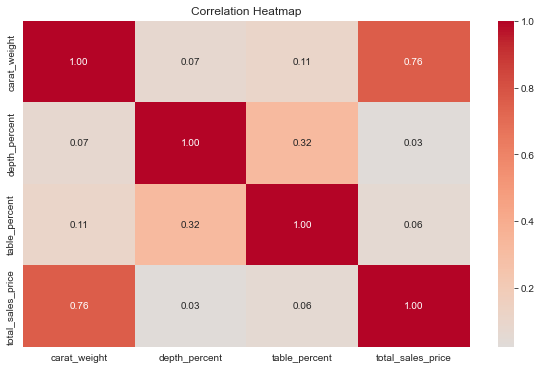

In [62]:
# Calculate the correlation between continuous variables and the target variable
correlation = df[list_of_continuous + target].corr()
print("Correlation between continuous variables and the target variable:")
print(correlation['total_sales_price'].sort_values(ascending=False))

# Visualize the correlation with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [63]:
# print(encoded_df.columns)
unknown_columns = [col for col in encoded_df.columns if 'unknown' in col]
print(unknown_columns)

['color_unknown', 'cut_quality_unknown', 'eye_clean_unknown', 'culet_size_unknown', 'culet_condition_unknown']


In [64]:
# Drop the specified columns in-place
encoded_df.drop(columns=['table_percent', 'depth_percent'], inplace=True)

encoded_df.to_csv('encoded_df.csv', index=False)

# Display the updated DataFrame
display(df.head())


,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price,unknown_count
0,0,Round,E,VVS2,0.09000,Excellent,IGI,Very Good,Very Good,unknown,...,M,M,unknown,None,unknown,unknown,unknown,unknown,200,7
1,1,Round,E,VVS2,0.09000,Very Good,IGI,Very Good,Very Good,unknown,...,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200,7
4,4,Round,E,VVS2,0.09000,Very Good,IGI,Very Good,Excellent,unknown,...,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200,7
5,5,Round,E,VVS2,0.09000,Very Good,IGI,Very Good,Very Good,unknown,...,TN,M,unknown,None,unknown,unknown,unknown,unknown,200,7
7,7,Round,E,VVS2,0.09000,Excellent,IGI,Very Good,Very Good,unknown,...,M,M,unknown,None,unknown,unknown,unknown,unknown,200,7


In [65]:
print(f'Amount of rows in dataframe: {len(df)}')

# Prepare the dataset
X = encoded_df.drop('total_sales_price', axis=1)
y = encoded_df['total_sales_price']

# Split the dataset into training and testing sets
# training is 20% and test size is 20% with a random number seed of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# display("Describe of x train: ", X_train.describe())

# Create a GradientBoostingRegressor model
model = GradientBoostingRegressor(
    n_estimators=200,   # Number of boosting stages to perform
    learning_rate=0.1,  # Shrinks the contribution of each tree by the learning_rate
    max_depth=3,        # Maximum depth of the individual regression estimators
    min_samples_split=2,  # The minimum number of samples required to split an internal node
    random_state=42     # Seed of the pseudo-random number generator used when shuffling the data
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Amount of rows in dataframe: 111624


In [66]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')

R-squared: 0.77
Mean Absolute Error: 1759.20
Mean Squared Error: 104622648.95
Root Mean Squared Error: 10228.52


In [67]:
# Predict target variable for the test set
y_pred = model.predict(X_test)

# Convert predictions to ranks
y_ranks = rankdata(y_pred, method='ordinal')

# Convert actual values to ranks
y_actual_ranks = rankdata(y_test, method='ordinal')

# Calculate Somers' D
n = len(y_test)
D = (sum(y_ranks) - (n * (n+1))/2) / (n * (n-1)/2) - (sum(y_actual_ranks) - (n * (n+1))/2) / (n * (n-1)/2)

print(f"Somers' D: {D:.2f}")

Somers' D: 0.00


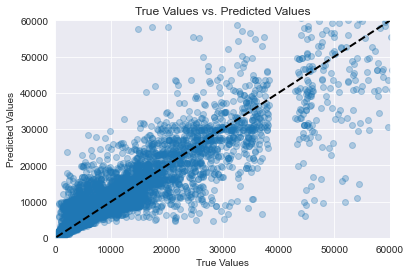

In [68]:
# Create a scatter plot of true values vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')

# Set x and y-axis limits
plt.xlim(0, 60000)
plt.ylim(0, 60000)

# Plot a line representing a perfect prediction (y_test = y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.show()


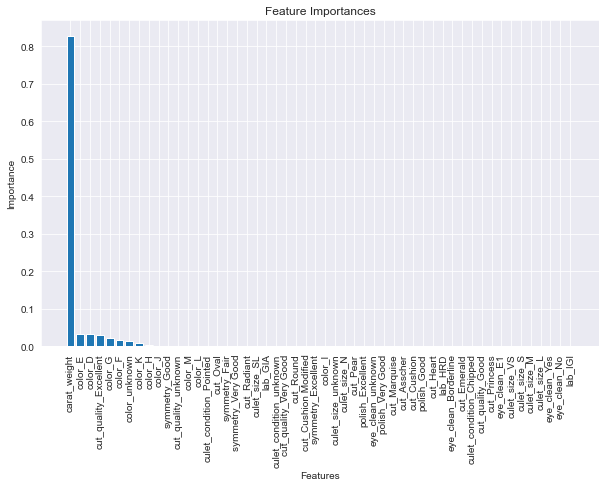

In [69]:
# Get feature importances
importances = model.feature_importances_

# Get the indices of the sorted importances
sorted_indices = np.argsort(importances)[::-1]

# Get the feature names corresponding to the sorted indices
sorted_features = X.columns[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')

plt.show()

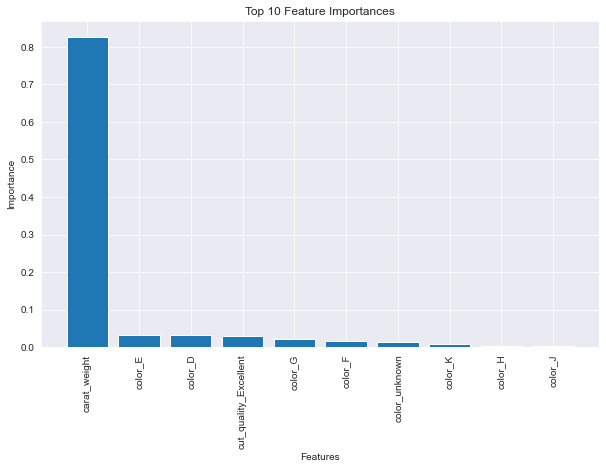

In [70]:

# Number of top features to display
top_n = 10

# Plot the top N feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), importances[sorted_indices][:top_n], align='center')
plt.xticks(range(top_n), sorted_features[:top_n], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top {} Feature Importances'.format(top_n))

plt.show()


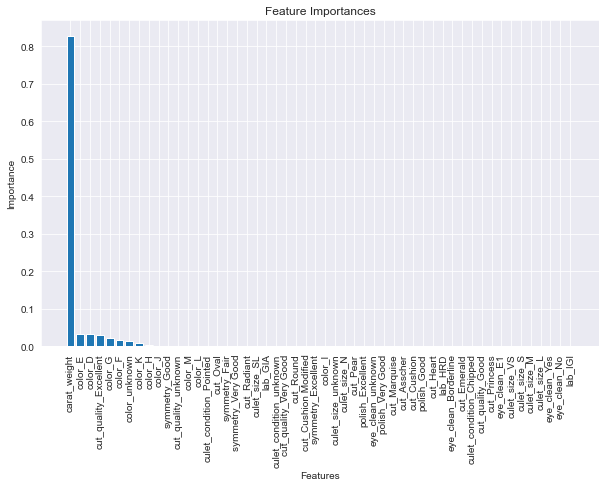

In [71]:
# Get feature importances
importances = model.feature_importances_

# Get the indices of the sorted importances
sorted_indices = np.argsort(importances)[::-1]

# Get the feature names corresponding to the sorted indices
sorted_features = X.columns[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')

plt.show()